To run in colab, earthpy must be installed in each new kernel

In [ ]:
!pip install earthpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 16.2 MB/s eta 0:00:00


In [ ]:
# Import packages
import os
import matplotlib.pyplot as plt
import geopandas as gpd
import earthpy as et

Load in the background shapefiles to be used for visualization as well as the plot locations. state_loc = state boundaries, plot_loc = plot locations, sage_loc = sagebrush distribution, nation_loc = national boundaries

In [ ]:
state_loc = gpd.read_file('.shp')
plot_loc = gpd.read_file('.shp')
sage_loc = gpd.read_file('shp')
nation_loc = gpd.read_file('.shp')

Filter only for countries in NA

In [ ]:
options = ['USA','CAN','MEX']
nation_loc=nation_loc[nation_loc['COUNTRY'].isin(options)]

Ensure that the projection of all layers matches that of the plot locations .shp

In [ ]:
state_loc_wgs84  = state_loc.to_crs({'init': 'epsg:4326'})
sage_loc_wgs84 = sage_loc.to_crs({'init':'epsg:4326'})
nation_loc_wgs84 = nation_loc.to_crs({'init':'epsg:4326'})


/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of 

Set boundaries

In [ ]:
minx, miny, maxx, maxy = plot_loc.total_bounds

Calculate percent change of variable being displayed

In [ ]:
plot_loc['big_change2'] = ((plot_loc['day_late_8'].astype('float64') - plot_loc['day_histor'].astype('float64'))/plot_loc['day_histor'].astype('float64'))*100

In [ ]:
plot_loc['big_change'] = plot_loc['temp_lat_1'].astype('float64') - plot_loc['temp_histo'].astype('float64')

In [ ]:
plot_loc = plot_loc[plot_loc['big_change']<=10]

It is necessary to set a constant column in order to visualize the plots as one color, not a great solution...

In [ ]:
plot_loc['one']=1

plot continous variables

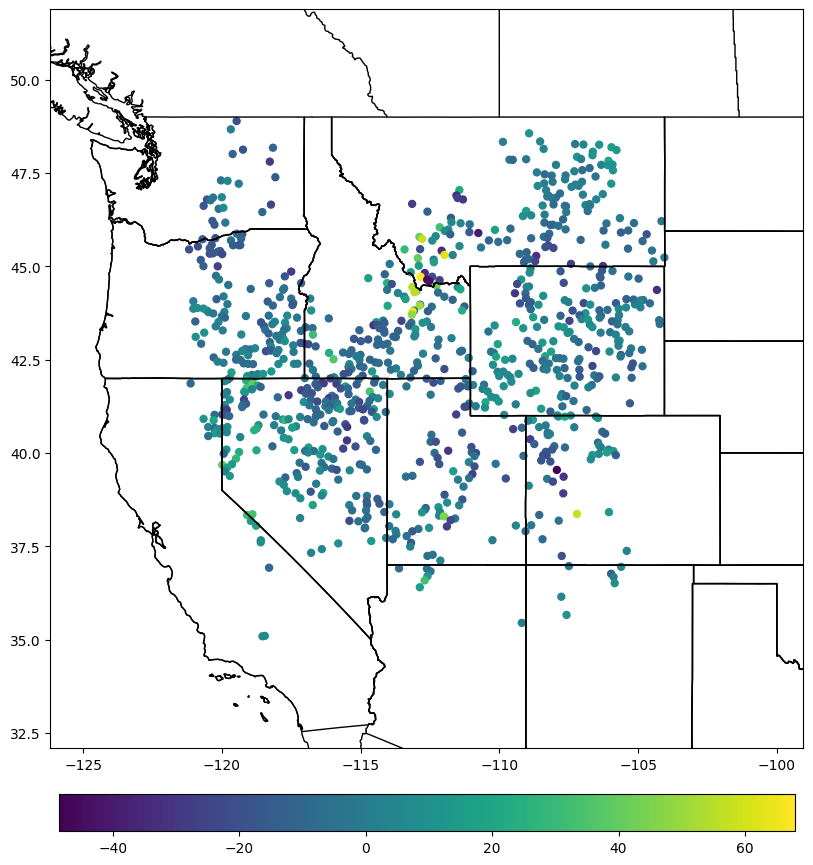

In [ ]:
fig, ax = plt.subplots(figsize = (10,12))
ax.set_xlim(minx-5, maxx+5)
ax.set_ylim(miny-3, maxy+3)
#sage_loc_wgs84.plot(ax=ax,edgecolor='grey',facecolor='grey')
state_loc_wgs84.boundary.plot(ax=ax,
                              edgecolor='black',
                              linewidth=1)
nation_loc_wgs84.plot(ax=ax,
                              edgecolor='black',
                      linewidth=1)
plot_loc.plot(column='big_change2',
                         categorical=False,
                         marker='.',
                         legend=True,
                         markersize=100,
                         cmap='viridis',
                         ax=ax,
              legend_kwds={'shrink': .95,'location':'bottom','pad':0.05})

plt.show()

display just plot locations

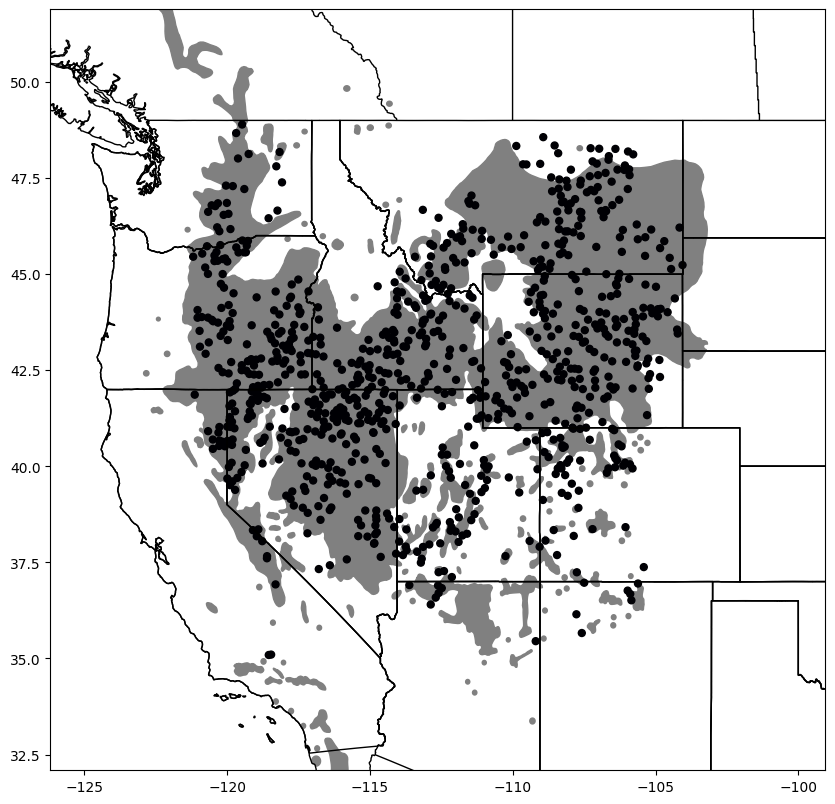

In [ ]:
fig, ax = plt.subplots(figsize = (10,12))
ax.set_xlim(minx-5, maxx+5)
ax.set_ylim(miny-3, maxy+3)
sage_loc_wgs84.plot(ax=ax,edgecolor='grey',facecolor='grey')
state_loc_wgs84.boundary.plot(ax=ax,
                              edgecolor='black',
                              linewidth=1)
nation_loc_wgs84.plot(ax=ax,
                              edgecolor='black',
                      linewidth=1)
plot_loc.plot(column='one',
                         categorical=True,
                         marker='.',
                         legend=False,
                         markersize=100,
                         cmap='magma',
                         ax=ax,
              legend_kwds={'shrink': .95,'location':'bottom','pad':0.05})

plt.show()